In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv


In [2]:
# Read Womens Clothing E-Commerce Reviews.csv:
import pandas as pd
df = pd.read_csv('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [3]:
# Only take the review and recommendation column
df = df.drop(df.columns[[0, 1, 2, 3, 5, 7, 8, 9, 10]], axis=1)
df = df.dropna()
df

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


Review Text: reviews of women's clothes. Recommended Id: 1 means Recommended, 0 means Not Recommended

In [4]:
# Split data into train data and test data
from sklearn.model_selection import train_test_split
review = df['Review Text'].values
recommendation = df['Recommended IND'].values
review_train, review_test, recommendation_train, recommendation_test = train_test_split(review, recommendation, test_size=0.2)

In [5]:
# Tokenization of review texts
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=50000, oov_token='x')
tokenizer.fit_on_texts(review_train) 
tokenizer.fit_on_texts(review_test)
 
sequence_train = tokenizer.texts_to_sequences(review_train)
sequence_test = tokenizer.texts_to_sequences(review_test)

padded_train = pad_sequences(sequence_train) 
padded_test = pad_sequences(sequence_test)

In [6]:
# Neural network model with a sequential model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=50000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
# Training process
# In addition, if we want to display accuracy in each model training process we can add a metrics parameter and fill it with the string 'accuracy'.
num_epochs = 10
history = model.fit(padded_train, recommendation_train, epochs=num_epochs, 
                    validation_data=(padded_test, recommendation_test), verbose=2)

Epoch 1/10
566/566 - 37s - loss: 0.3340 - accuracy: 0.8583 - val_loss: 0.2426 - val_accuracy: 0.8960
Epoch 2/10
566/566 - 34s - loss: 0.2155 - accuracy: 0.9103 - val_loss: 0.2527 - val_accuracy: 0.8951
Epoch 3/10
566/566 - 34s - loss: 0.1794 - accuracy: 0.9270 - val_loss: 0.2849 - val_accuracy: 0.8987
Epoch 4/10
566/566 - 35s - loss: 0.1537 - accuracy: 0.9387 - val_loss: 0.2879 - val_accuracy: 0.8900
Epoch 5/10
566/566 - 36s - loss: 0.1269 - accuracy: 0.9520 - val_loss: 0.2984 - val_accuracy: 0.8920
Epoch 6/10
566/566 - 35s - loss: 0.1067 - accuracy: 0.9595 - val_loss: 0.3477 - val_accuracy: 0.8872
Epoch 7/10
566/566 - 35s - loss: 0.0951 - accuracy: 0.9647 - val_loss: 0.3756 - val_accuracy: 0.8797
Epoch 8/10
566/566 - 35s - loss: 0.0788 - accuracy: 0.9727 - val_loss: 0.4022 - val_accuracy: 0.8828
Epoch 9/10
566/566 - 35s - loss: 0.0674 - accuracy: 0.9744 - val_loss: 0.4249 - val_accuracy: 0.8715
Epoch 10/10
566/566 - 34s - loss: 0.0573 - accuracy: 0.9802 - val_loss: 0.4394 - val_accura

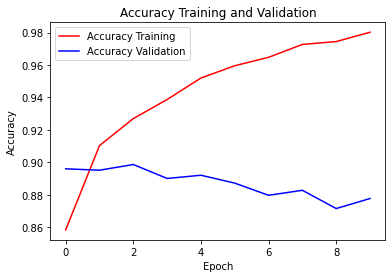

In [8]:
# Plotting training accuracy and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r', label='Accuracy Training')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy Validation')
plt.title('Accuracy Training and Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

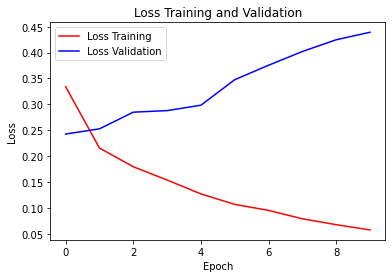

In [9]:
# Plotting training loss and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r', label='Loss Training')
plt.plot(history.history['val_loss'], 'b', label='Loss Validation')
plt.title('Loss Training and Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

You can tinker with the Sequential Model part to get great results like adding the dropout() function.

In [10]:
# You can try your review.
my_review = ["I really wanted to like this dress. the material, design, length and fit all over was perfect, except for the armholes- too big and the ruffles came right upto the nipple line. not comfortable with that. sadly, had to return."]
result = tokenizer.texts_to_sequences(my_review)
result = pad_sequences(result)

#print recommended or not
import numpy as np
result = model.predict_classes(result)
if result == [0]:
  print('Not Recommended')
elif result == [1]:
  print('Recommended')

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Not Recommended
